In [162]:
!pip install scikit-learn==1.2.2
# Importing Required Library
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
import statsmodels.formula.api as sf


In [163]:
# importing Dataset  into collab environmet
df=pd.read_csv("/content/Titanic_train.csv")

In [164]:
#dataset overview
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [165]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [166]:
#dataset columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [167]:
#dataset rows and columns
df.shape

(891, 12)

In [168]:
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")

Total Rows: 891
Total Columns: 12


In [169]:
#dataset description
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [170]:
#datset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [171]:
#duplicated value
df.duplicated().sum()

0

In [172]:
#checking null value
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

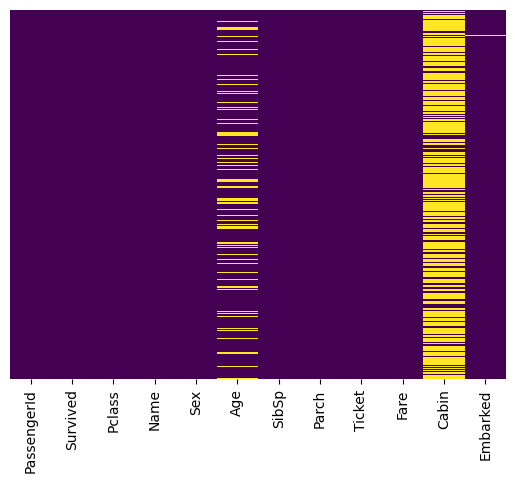

In [173]:
#null value visulaization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [174]:
#checkuing unique values
for i in df.columns:
 print(f"Columns {i} Contain {df[i].nunique()} unique values")

Columns PassengerId Contain 891 unique values
Columns Survived Contain 2 unique values
Columns Pclass Contain 3 unique values
Columns Name Contain 891 unique values
Columns Sex Contain 2 unique values
Columns Age Contain 88 unique values
Columns SibSp Contain 7 unique values
Columns Parch Contain 7 unique values
Columns Ticket Contain 681 unique values
Columns Fare Contain 248 unique values
Columns Cabin Contain 147 unique values
Columns Embarked Contain 3 unique values


<Axes: >

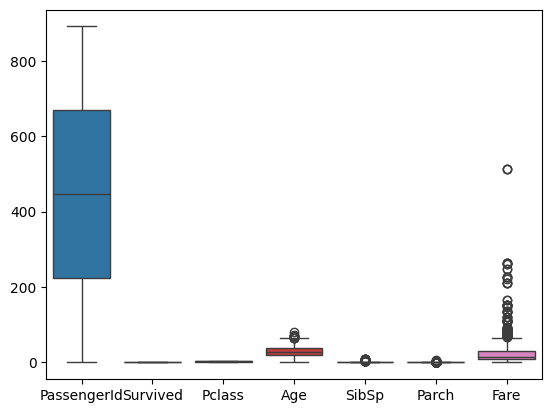

In [175]:
#cchecking outliers
sns.boxplot(df)

#EDA

In [176]:
total_survived=df.groupby('Sex')['Survived'].count()
total_survived

,Survived
Sex,
female,314
male,577


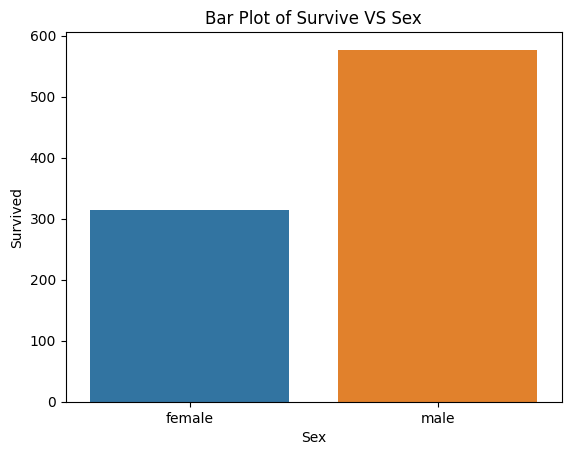

In [273]:
sns.barplot(x=total_survived.index,y=total_survived.values,hue=total_survived.index)
plt.title("Bar Plot of Survive VS Sex")
plt.ylabel("Survived")
plt.xlabel("Sex")
plt.show()

In [178]:
class_count=df.groupby('Pclass')['Survived'].count()
class_count

,Survived
Pclass,
1,216
2,184
3,491


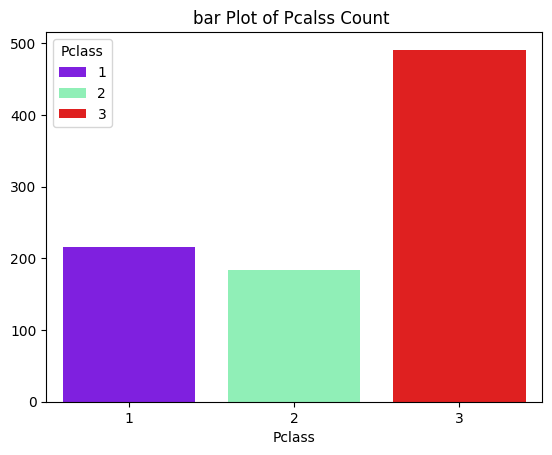

In [272]:
sns.barplot(x=class_count.index,y=class_count.values,hue=class_count.index,palette='rainbow')
plt.title("bar Plot of Pcalss Count ")
plt.show()

In [180]:
Embarked_count=df.groupby('Embarked')['Survived'].count()
Embarked_count

,Survived
Embarked,
C,168
Q,77
S,644


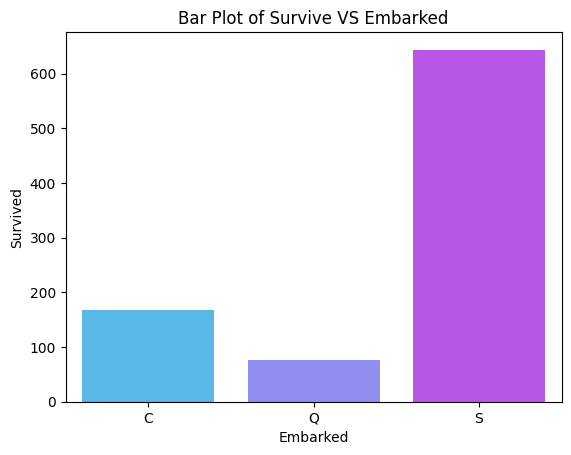

In [271]:
sns.barplot(x=Embarked_count.index,y=Embarked_count.values,hue=Embarked_count.index,palette='cool')
plt.title("Bar Plot of Survive VS Embarked")
plt.ylabel("Survived")
plt.xlabel("Embarked")
plt.show()

In [182]:
price_embarked=df.groupby('Embarked')['Fare'].mean()
price_embarked

,Fare
Embarked,
C,59.954144
Q,13.276030
S,27.079812


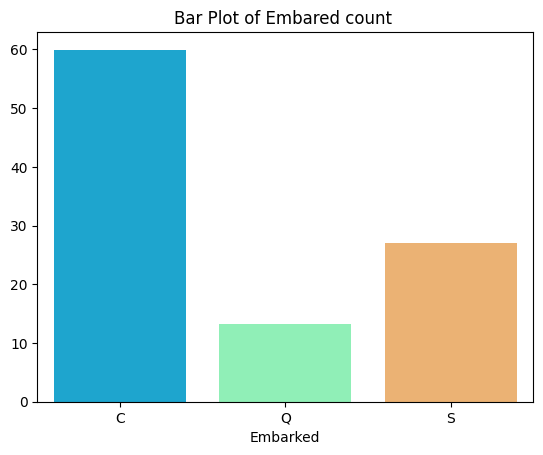

In [270]:
sns.barplot(x=price_embarked.index,y=price_embarked.values,hue=price_embarked.index,palette='rainbow')
plt.title("Bar Plot of Embared count ")
plt.show()

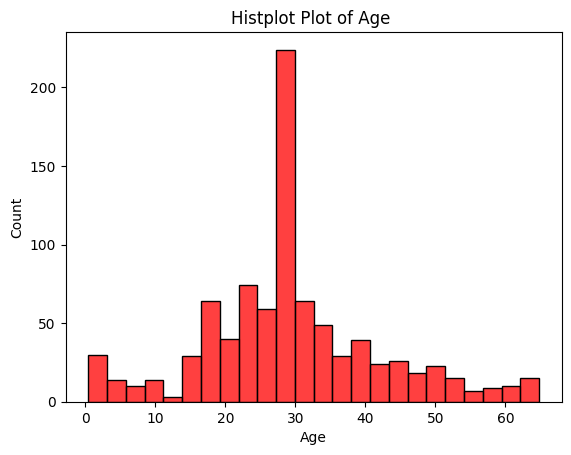

In [269]:
sns.histplot(df['Age'],color='red')

plt.title("Histplot Plot of Age ")
plt.show()

* I understand from analyzing the chart above that there may be outliers on both the upper and lower extremes.



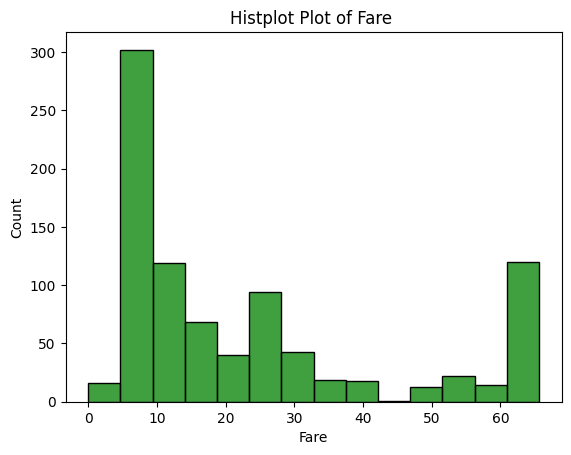

In [274]:
sns.histplot(df['Fare'],color='green')

plt.title("Histplot Plot of Fare ")
plt.show()

* I understand from analyzing the chart above that there may be outliers on the upper.



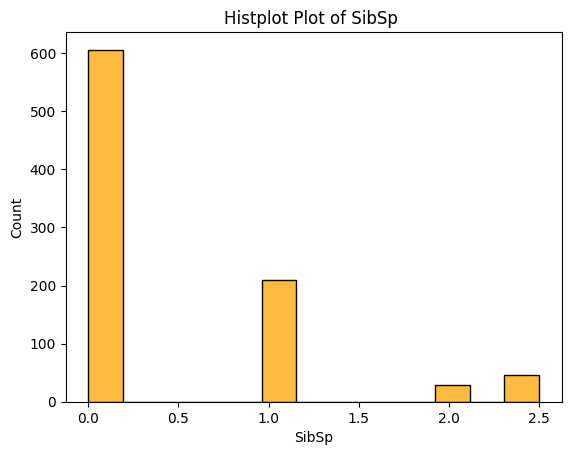

In [275]:
sns.histplot(df['SibSp'],color='orange')
plt.title("Histplot Plot of SibSp ")
plt.show()

* I understand from analyzing the chart above that there may be outliers on  the upper extremes.



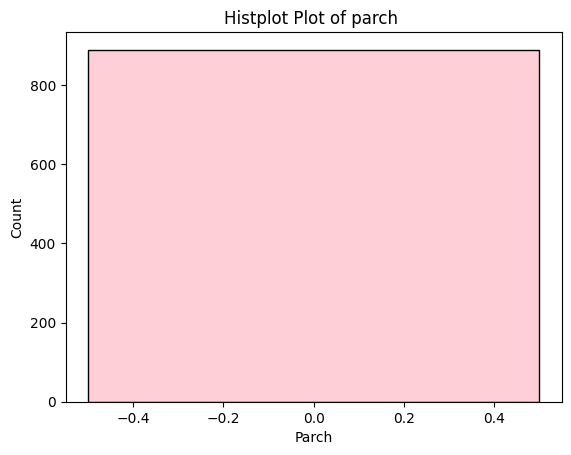

In [276]:
sns.histplot(df['Parch'],color='pink')
plt.title("Histplot Plot of parch ")
plt.show()

* I understand from analyzing the chart above that there may be outliers on the upper extream.



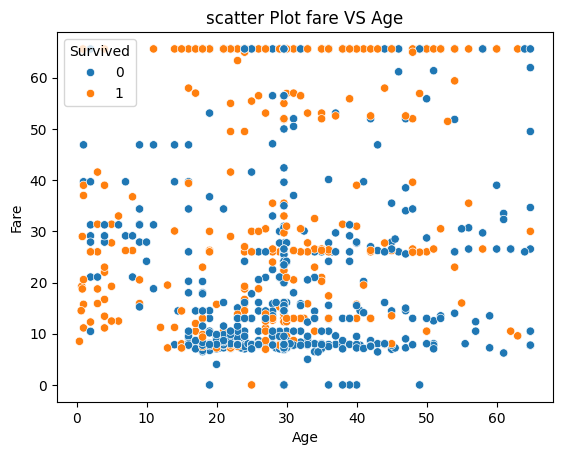

In [277]:
sns.scatterplot(x='Age',y='Fare',data=df,hue='Survived')
plt.title("scatter Plot fare VS Age")
plt.show()

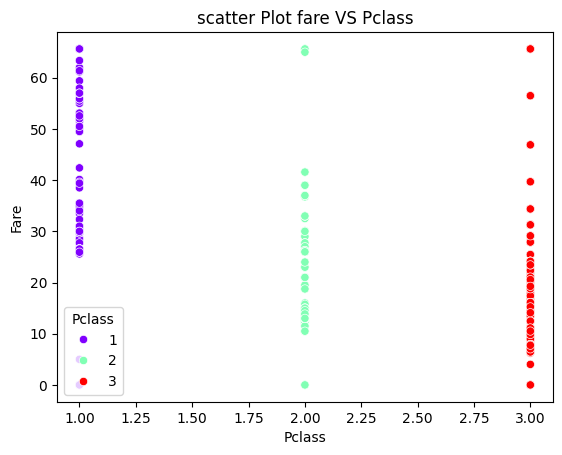

In [278]:
sns.scatterplot(x='Pclass',y='Fare',data=df,hue='Pclass',palette='rainbow')
plt.title("scatter Plot fare VS Pclass")
plt.show()

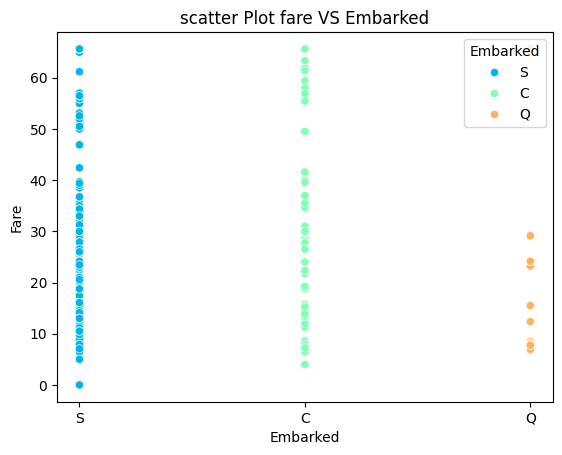

In [282]:
sns.scatterplot(x='Embarked',y='Fare',data=df,hue='Embarked',palette='rainbow')
plt.title("scatter Plot fare VS Embarked")
plt.show()

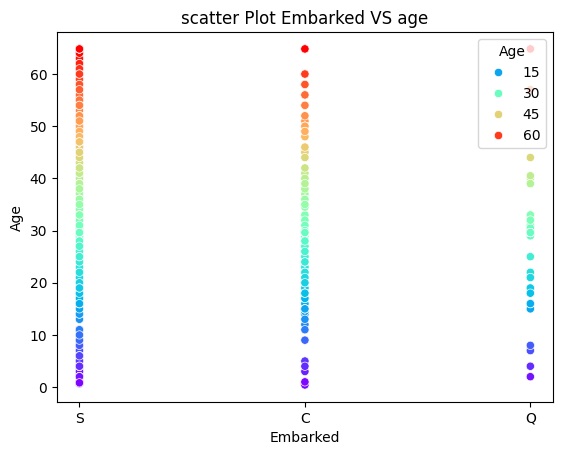

In [284]:
sns.scatterplot(x='Embarked',y='Age',data=df,hue='Age',palette='rainbow')
plt.title("scatter Plot Embarked VS age")
plt.show()

#Pre-Processing

In [190]:
#Removing Unwanted columns
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [191]:
#after removing Columns dataset preview will be
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [192]:
#outlier treatment
def outlier_treatment(df,col):
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower_limit=q1-1.5*iqr
  upper_limit=q3+1.5*iqr
  return lower_limit,upper_limit

In [193]:
lower_limit,upper_limit=outlier_treatment(df,'Fare')
df['Fare']=np.where(df['Fare']>upper_limit,upper_limit,df['Fare'])

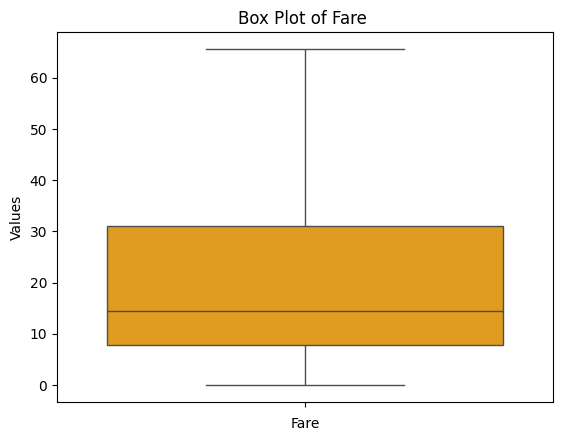

In [266]:
sns.boxplot(df['Fare'],color='orange')
plt.xlabel("Fare")
plt.ylabel("Values")
plt.title("Box Plot of Fare ")
plt.show()

In [195]:
lower_limit,upper_limit=outlier_treatment(df,'Age')
df['Age']=np.where(df['Age']>upper_limit,upper_limit,df['Age'])

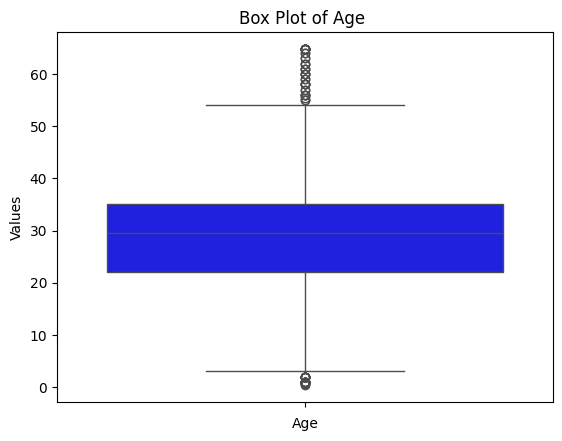

In [267]:
sns.boxplot(df['Age'],color='blue')
plt.xlabel("Age")
plt.ylabel("Values")
plt.title("Box Plot of Age ")
plt.show()

In [197]:
lower_limit,upper_limit=outlier_treatment(df,'SibSp')
df['SibSp']=np.where(df['SibSp']>upper_limit,upper_limit,df['SibSp'])

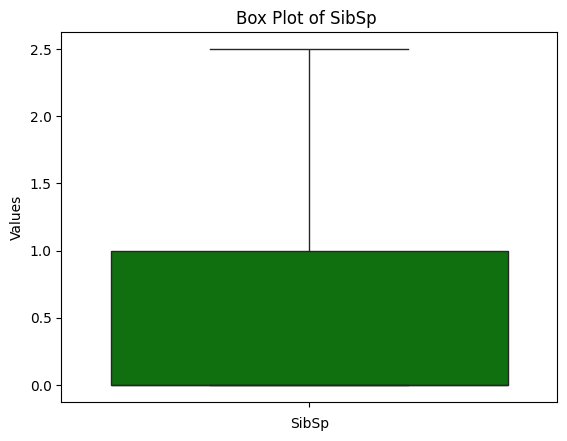

In [263]:
sns.boxplot(df['SibSp'], color='green')
plt.xlabel("SibSp")
plt.ylabel("Values")
plt.title("Box Plot of SibSp ")
plt.show()

In [199]:
lower_limit,upper_limit=outlier_treatment(df,'Parch')
df['Parch']=np.where(df['Parch']>upper_limit,upper_limit,df['Parch'])

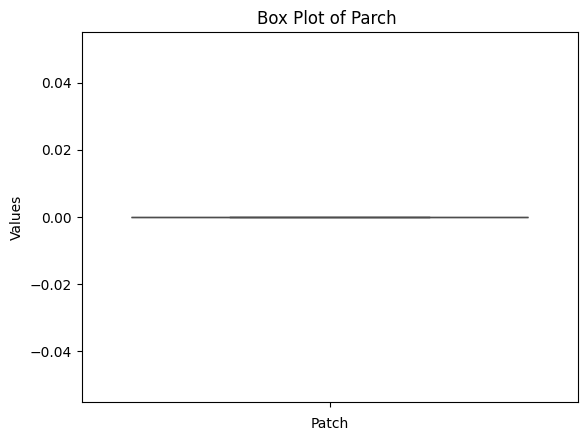

In [262]:
sns.boxplot(df['Parch'],color='red')

plt.xlabel("Patch")
plt.ylabel("Values")
plt.title("Box Plot of Parch ")
plt.show()

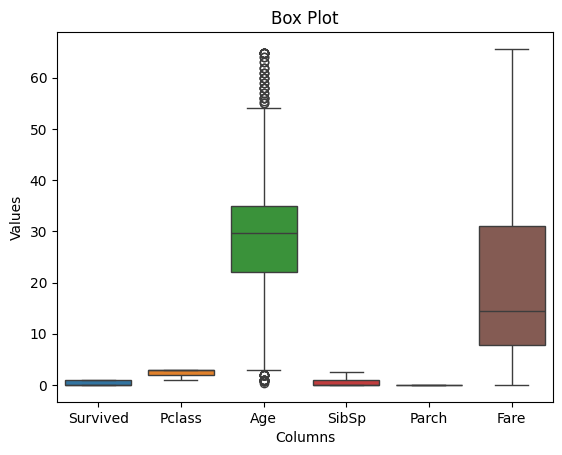

In [258]:
#After outlier treatment dataset will be
sns.boxplot(df)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Box Plot")
plt.show()

In [202]:
#Checking null values percentage in age columns
df['Age'].isnull().sum()/len(df)*100

19.865319865319865

In [203]:
#By calculating percentage replacing null values with mean
df['Age']=df['Age'].fillna(df['Age'].mean())

In [204]:
#Checking null percentage values in Embarked columns

df['Embarked'].isnull().sum()/len(df)

0.002244668911335578

In [205]:
#By calculating percentage removing rows contains null values
df.dropna(inplace=True)


In [206]:
#data set after null values treatment
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [207]:
#splitting data set into dependent and independent variable
x=df.drop('Survived',axis=1)
y=df['Survived']

In [208]:
#perview of x
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1.0,0.0,7.2500,S
1,1,female,38.0,1.0,0.0,65.6344,C
2,3,female,26.0,0.0,0.0,7.9250,S
3,1,female,35.0,1.0,0.0,53.1000,S
4,3,male,35.0,0.0,0.0,8.0500,S


In [209]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [210]:
#feature encoding
x=pd.get_dummies(x)

In [211]:
# independent columns after encoding
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0000,1.0,0.0,7.2500,False,True,False,False,True
1,1,38.0000,1.0,0.0,65.6344,True,False,True,False,False
2,3,26.0000,0.0,0.0,7.9250,True,False,False,False,True
3,1,35.0000,1.0,0.0,53.1000,True,False,False,False,True
4,3,35.0000,0.0,0.0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0000,0.0,0.0,13.0000,False,True,False,False,True
887,1,19.0000,0.0,0.0,30.0000,True,False,False,False,True
888,3,29.6227,1.0,0.0,23.4500,True,False,False,False,True
889,1,26.0000,0.0,0.0,30.0000,False,True,True,False,False


In [212]:
#Normalization of data
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [213]:
#dataset after normalization
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.825209,-0.593232,0.808286,0.0,-0.818876,-0.735342,0.735342,-0.482711,-0.307941,0.616794
1,-1.572211,0.659492,0.808286,0.0,2.043417,1.359911,-1.359911,2.071634,-0.307941,-1.621287
2,0.825209,-0.280051,-0.603436,0.0,-0.785784,1.359911,-1.359911,-0.482711,-0.307941,0.616794
3,-1.572211,0.424606,0.808286,0.0,1.428918,1.359911,-1.359911,-0.482711,-0.307941,0.616794
4,0.825209,0.424606,-0.603436,0.0,-0.779656,-0.735342,0.735342,-0.482711,-0.307941,0.616794
...,...,...,...,...,...,...,...,...,...,...
884,-0.373501,-0.201756,-0.603436,0.0,-0.536983,-0.735342,0.735342,-0.482711,-0.307941,0.616794
885,-1.572211,-0.828117,-0.603436,0.0,0.296442,1.359911,-1.359911,-0.482711,-0.307941,0.616794
886,0.825209,0.003589,0.808286,0.0,-0.024672,1.359911,-1.359911,-0.482711,-0.307941,0.616794
887,-1.572211,-0.280051,-0.603436,0.0,0.296442,-0.735342,0.735342,2.071634,-0.307941,-1.621287


#Model

In [214]:
#splitting data set for validation
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [215]:
#preview of xtrain
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
251,-1.572211,2.538578,-0.603436,0.0,0.127305,-0.735342,0.735342,-0.482711,-0.307941,0.616794
30,-1.572211,0.816083,-0.603436,0.0,0.184704,-0.735342,0.735342,2.071634,-0.307941,-1.621287
10,0.825209,-2.002546,0.808286,0.0,-0.355590,1.359911,-1.359911,-0.482711,-0.307941,0.616794
871,0.825209,1.364149,-0.603436,0.0,-0.733083,-0.735342,0.735342,-0.482711,-0.307941,0.616794
182,-0.373501,-2.237432,2.220008,0.0,0.737666,-0.735342,0.735342,-0.482711,-0.307941,0.616794


In [216]:
#preview of xtest
x_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
559,0.825209,0.003589,-0.603436,0.0,-0.794364,-0.735342,0.735342,-0.482711,3.247377,-1.621287
37,0.825209,-0.671527,-0.603436,0.0,-0.779656,-0.735342,0.735342,-0.482711,-0.307941,0.616794
614,-0.373501,-0.436641,0.808286,0.0,2.012315,1.359911,-1.359911,-0.482711,-0.307941,0.616794
169,-1.572211,2.460282,-0.603436,0.0,0.468029,-0.735342,0.735342,-0.482711,-0.307941,0.616794
68,0.825209,-0.280051,2.220008,0.0,-0.749629,-0.735342,0.735342,-0.482711,-0.307941,0.616794


In [217]:
#preview of ytrain
y_train.head()

,Survived
252,0
30,0
10,1
873,0
183,1


In [218]:
#preview of ytest
y_test.head()

,Survived
560,0
37,0
615,1
170,0
69,0


In [219]:
#creating Instance for XGBM
from xgboost import XGBClassifier

In [220]:
#fitting training data in model
xg=XGBClassifier()
xmodel=xg.fit(x_train,y_train)

In [221]:
#checking accurcy on testing part
xmodel.score(x_test,y_test)

0.8146067415730337

In [222]:
#checking Precision for XGBM
y_pred=xmodel.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       111
           1       0.77      0.72      0.74        67

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



In [250]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [251]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix - ')
plt.show()

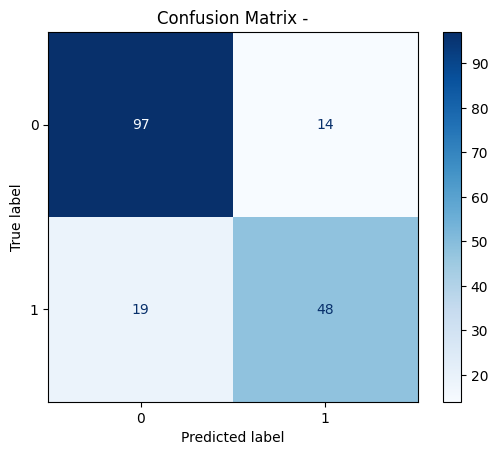

In [252]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix - XGBClassifier')
plt.show()


In [223]:
#creating instance for LGBM
from lightgbm import LGBMClassifier

In [224]:
#fitting training data in model
lg=LGBMClassifier()
lmodel=xg.fit(x_train,y_train)

In [225]:
#checking accurcy on testing part
lmodel.score(x_test,y_test)

0.8146067415730337

In [226]:
#checking Precision for LGBM
y_pred=lmodel.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       111
           1       0.77      0.72      0.74        67

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



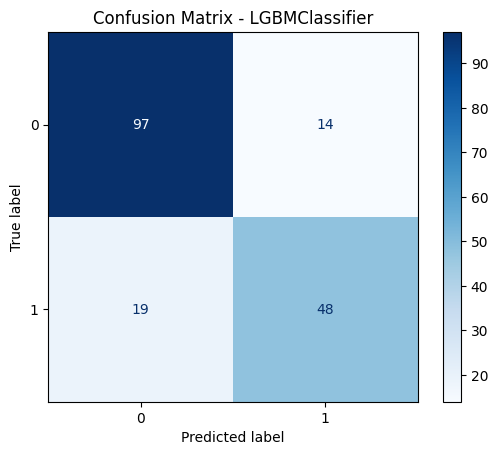

In [253]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix - LGBMClassifier')
plt.show()

In [227]:
#Model tunning
params = {
    'n_estimators' : [90,110,150], # randomly select no. of trees/models
    'learning_rate' : [0.5,0.7,1], # alpha between 0 to 1
    'lambda': [1,2,3],
    'max_depth' : [3,7,11]
}

In [228]:
# randomsearch cv
from sklearn.model_selection import RandomizedSearchCV


In [229]:
grid = GridSearchCV(XGBClassifier(),param_grid=params,verbose=1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'lambda': [1, 2, 3], 'learning_rate': [0.5, 0.7, 1],
                         'max_depth': [3, 7, 11],
                         'n_estimators': [90, 110, 150]},
             verbose=1)

In [230]:
grid.best_params_

{'lambda': 2, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 90}

In [231]:
final_xg=XGBClassifier(reg_lambda=2,learning_rate=0.5,max_depth=3,n_estimators=90)

In [232]:
final_model=final_xg.fit(x_train,y_train)

In [233]:
#After tunnung a model
final_model.score(x_test,y_test)

0.8146067415730337

In [249]:
#checking Precision for LGBM
y_pred=final_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       111
           1       0.77      0.72      0.74        67

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



Test Model On Testing Dataset

In [234]:
df_test=pd.read_csv("/content/Titanic_test.csv")

In [235]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [236]:
#Removing Unwanted columns
df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [237]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [238]:
df_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [239]:
df_test['Age']=df_test['Age'].fillna(df_test['Age'].mean())

In [240]:
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].mean())

In [241]:
df_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [242]:
df_test=pd.get_dummies(df_test)

In [243]:
df_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.50000,0,0,7.8292,False,True,False,True,False
1,3,47.00000,1,0,7.0000,True,False,False,False,True
2,2,62.00000,0,0,9.6875,False,True,False,True,False
3,3,27.00000,0,0,8.6625,False,True,False,False,True
4,3,22.00000,1,1,12.2875,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,False,True,False,False,True
414,1,39.00000,0,0,108.9000,True,False,True,False,False
415,3,38.50000,0,0,7.2500,False,True,False,False,True
416,3,30.27259,0,0,8.0500,False,True,False,False,True


In [244]:
y_pred_test = xmodel.predict(df_test)


In [246]:
df_test['Survived']=y_pred_test

In [248]:
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,34.5,0,0,7.8292,False,True,False,True,False,0
1,3,47.0,1,0,7.0000,True,False,False,False,True,0
2,2,62.0,0,0,9.6875,False,True,False,True,False,0
3,3,27.0,0,0,8.6625,False,True,False,False,True,0
4,3,22.0,1,1,12.2875,True,False,False,False,True,0




---



---






1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

Employ the same dataset to train the LightGBM and XGBoost models, then compare their results using metrics such as ROC-AUC, F1-score, accuracy, precision, and recall. While precision and recall concentrate on positive class predictions, accuracy demonstrates total correctness. For a balance between recall and precision, use the F1-score; for class separation ability, use the ROC-AUC.

2. Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

Make confusion matrices to show misclassifications, bar graphs to compare metrics, and ROC curves to examine trade-offs between true and false positives.

3. Metrics of Performance:

Accuracy: XGBoost outperformed LightGBM in edge instances, but both models showed comparable overall accuracy.
accuracy & Recall: Both the model  demonstrated greater recall, catching more real positives.
F1-Score: both models showed comparable similar accuracy.

